In [1]:
print('This is a code cell.')
print('You can have one or more lines of code here.')

# This is a comment.
# Use comments to make your code readable.
# Comment is not code and will not be executed.

This is a code cell.
You can have one or more lines of code here.


This is a markdown cell.
You can use HTML-style code here.

<b>This sentence is in bold.</b>

You can double-click any cell to edit its contents.

In [ ]:
# You can use a code cell like a calculator.
# However, if you have more than one line of code, only the result from the last line will be displayed.

1+2
2+3

In [1]:
# The code in this cell installs a Python package called "datascience."
# If you have the Anaconda package installed on your personal computer, running this cell ONCE is enough.

import sys
!"{sys.executable}" -m pip install datascience

     |████████████████████████████████| 721 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 27.7 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 12.3 MB/s eta 0:00:01


  Created wheel for datascience: filename=datascience-0.17.0-py3-none-any.whl size=726848 sha256=d4163b20583b0f06d531a87b6be1ab431d605d92e5ebaf1c9fd5281ee625c842
  Stored in directory: /Users/hapham/Library/Caches/pip/wheels/6b/4e/13/da8fe1a6d1beb0d09f563c4bfab92f58496f4df8c0ab3ffc4e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=18e22150bb6fcb9536620d8d6c5c2f29bd42f4e4ca688861f843ae56810253be
  Stored in directory: /Users/hapham/Library/Caches/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built datascience docopt


In [2]:
# Stuff that'll appear at the top of notebooks;
# You don't have to do anything about it.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
# Read two books, fast!

from urllib.request import urlopen 
import re

def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

In [5]:
# Display the chapters of Huckleberry Finn

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


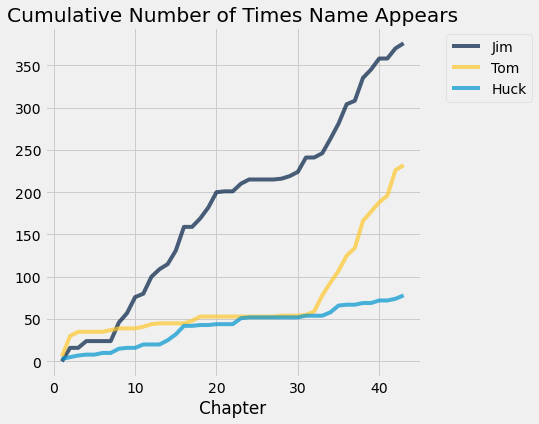

In [6]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

In [7]:
# In each chapter, count the number of all characters and call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')])

In [8]:
# The counts for Huckleberry Finn

chars_periods_hf

HF Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


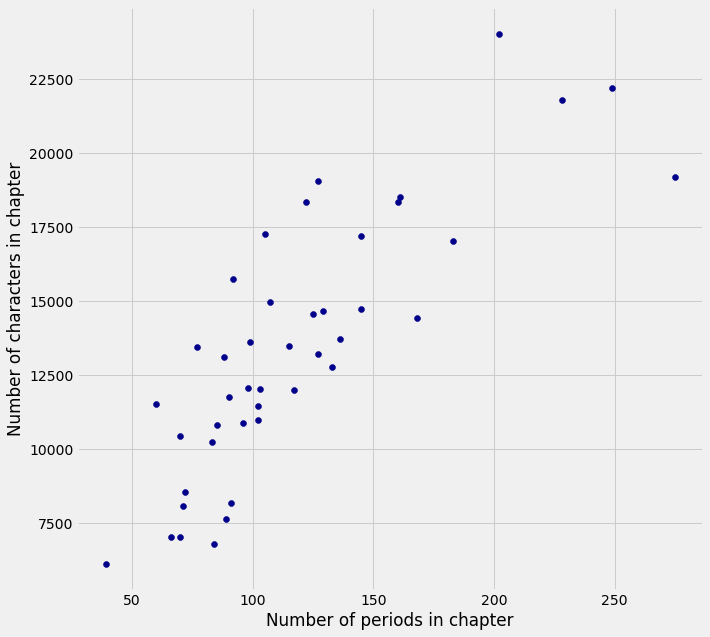

In [9]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

In [10]:
msft = Table.read_table('https://www.dropbox.com/s/46ypdrs5bicrr16/msft.csv?raw=1')
msft

PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,TSYMBOL,NAICS,PRIMEXCH,TRDSTAT,SECSTAT,PERMCO,ISSUNO,HEXCD,HSICCD,CUSIP,DCLRDT,DLAMT,DLPDT,DLSTCD,NEXTDT,PAYDT,RCRDDT,SHRFLG,HSICMG,HSICIG,DISTCD,DIVAMT,FACPR,FACSHR,ACPERM,ACCOMP,SHRENDDT,NWPERM,DLRETX,DLPRC,DLRET,TRTSCD,NMSIND,MMCNT,NSDINX,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,CFACPR,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
10107,20070131,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,2.00703e+07,nan,nan,nan,nan,1,6,85,9,29.64,31.21,30.86,13390496,0.03349,30.86,30.87,9792314,1,1,30.86,nan,20070131,0.03349,0.019397,0.018461,0.022283,0.021357,0.014059
10107,20070228,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,2.00612e+07,nan,nan,nan,nan,2.00703e+07,2.00702e+07,0,nan,nan,1232,0.1,0,0,nan,nan,nan,nan,nan,nan,nan,1,6,85,1,27.87,30.56,28.17,13007733,-0.083927,28.15,28.16,9792314,1,1,28.17,nan,20070228,-0.087168,-0.013988,-0.015979,0.002111,0.000857,-0.021846
10107,20070330,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,2.00704e+07,nan,nan,nan,nan,1,6,88,1,26.72,28.52,27.87,12832900,-0.01065,27.86,27.87,9572000,1,1,27.87,nan,20070330,-0.01065,0.01295,0.011475,0.006545,0.004805,0.00998
10107,20070430,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,2.00706e+07,nan,nan,nan,nan,1,6,90,55,27.74,30.12,29.94,9676052,0.074273,29.94,29.95,9566808,1,1,29.94,nan,20070430,0.074273,0.039815,0.038449,0.027044,0.025768,0.043291
10107,20070531,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,2.00703e+07,nan,nan,nan,nan,2.00706e+07,2.00705e+07,0,nan,nan,1232,0.1,0,0,nan,nan,nan,nan,nan,nan,nan,1,6,88,55,30.17,31.11,30.6901,13176580,0.028393,30.68,30.7,9566808,1,1,30.6901,nan,20070531,0.025053,0.038932,0.036643,0.023123,0.021362,0.032549
10107,20070629,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,2.00707e+07,nan,nan,nan,nan,1,6,88,55,29.47,30.715,29.47,11884314,-0.039756,29.45,29.47,9380000,1,1,29.47,nan,20070629,-0.039756,-0.014765,-0.016128,-0.007907,-0.009857,-0.017816
10107,20070731,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,6,89,55,28.99,31.51,28.99,13008446,-0.016288,28.98,28.99,9380000,1,1,28.99,nan,20070731,-0.016288,-0.03176,-0.032764,-0.043537,-0.044642,-0.031982
10107,20070831,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,2.00706e+07,nan,nan,nan,nan,2.00709e+07,2.00708e+07,0,nan,nan,1232,0.1,0,0,nan,nan,2.00709e+07,nan,nan,nan,nan,1,6,86,55,27.81,30,28.73,12397224,-0.005519,28.68,28.69,9375492,1,1,28.73,nan,20070831,-0.008969,0.01163,0.009677,-0.011712,-0.013287,0.012864
10107,20070928,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,2.0071e+07,nan,nan,nan,nan,1,6,87,55,28.4201,29.5599,29.46,11168623,0.025409,29.46,29.47,9355000,1,1,29.46,nan,20070928,0.025409,0.040842,0.039325,0.025364,0.023661,0.035794
10107,20071031,nan,11,3,7370,59491810,MSFT,MICROSOFT CORP,nan,MSFT,511210,Q,A,R,8048,10539,3,7370,59491810,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,2.00712e+07,nan,nan,nan,nan,1,6,84,55,29.4525,36.81,36.81,17744802,0.249491,36.79,36.8,9355439,1,1,36.81,nan,20071031,0.249491,0.025796,0.024655,0.017406,0.016144,0.014822


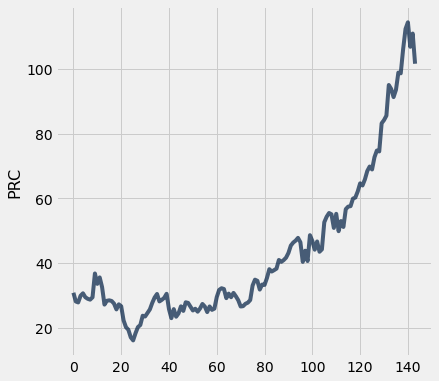

In [11]:
msft.select('PRC').plot()